In [3]:
import numpy
from syntheticyeastcells import create_samples, colored_segmentation_map

In [4]:
images, labels = create_samples(
  # number of samples to create:
  n_images=9,

  # number of cells per image
  n_cells_per_image=100,

  # image dimensions (height, width)
  size=(512, 512),

  # area at the boundary to not have cells
  min_distance_boundary=50,

  # range for the first radius of the ellipse as
  # an approximate of a cell, from which is sampled
  # uniformly
  r0_range=(2, 14),

  # range for the second radius of the ellipse as
  # an approximate of a cell as a factor of the first
  # radius, from which is sampled uniformly.
  r1_factor_range=(0.7, 1.3),

  # the background consists of gaussian noise, blurred by this
  # standard deviation.
  spatial_blur_std=1.5,

  # expected background greyscale, assuming a [0, 1] range
  background_intensity=0.4,

  # standard deviation of the noise outside of cells
  background_contrast=0.00188,

  # standard deviation of the noise inside cells
  core_contrast=0.0282,

  # probability the outside of a cell is white, and the
  # inside is white, instead of the other way around.
  p_white_outside=0.5
)

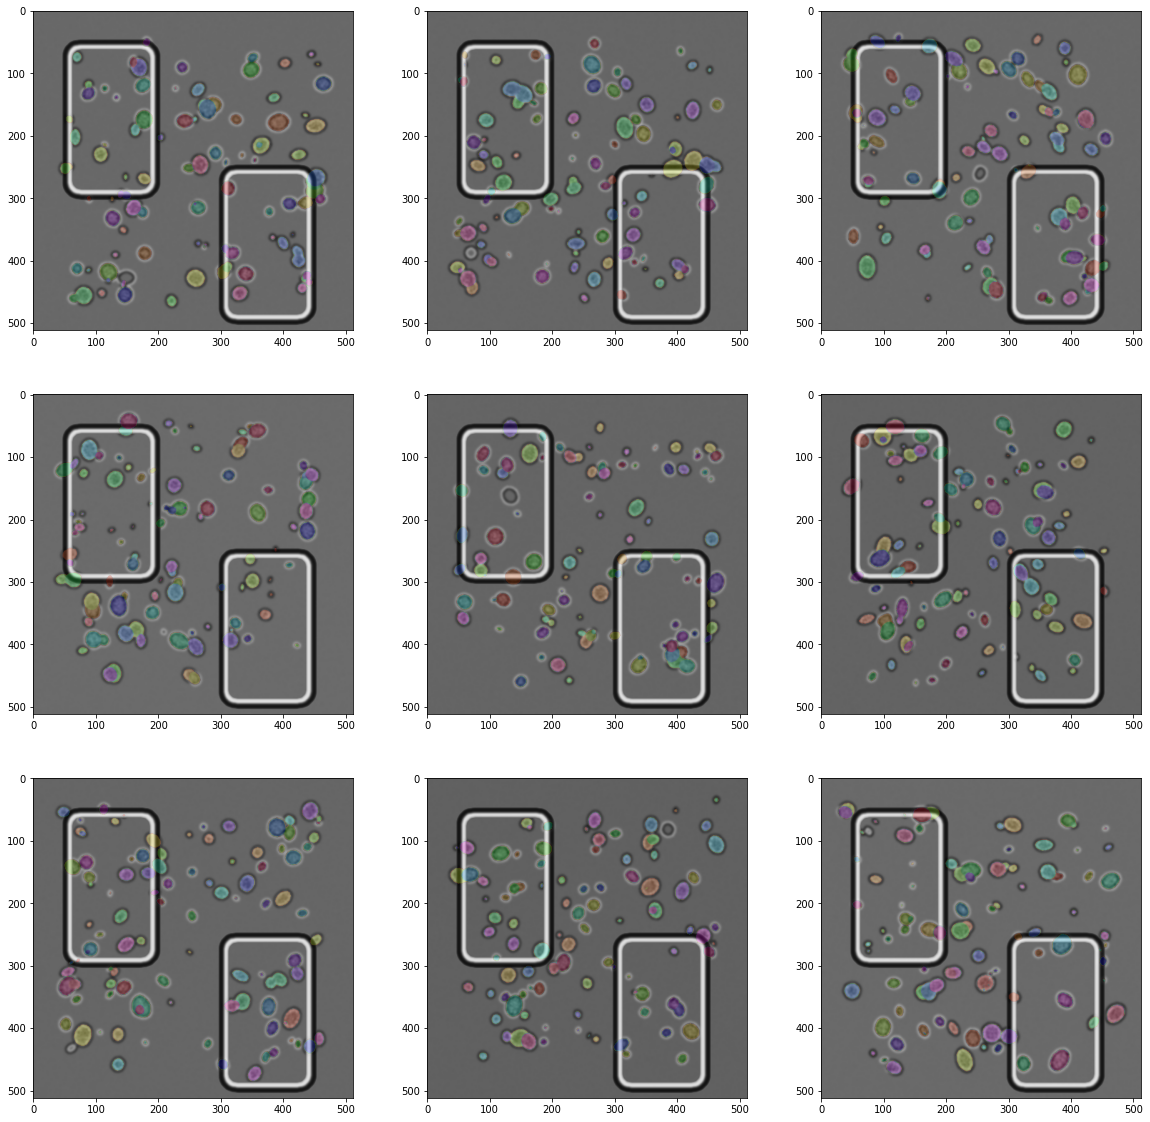

In [5]:
from matplotlib import pyplot

axes = pyplot.subplots(3, 3, figsize=(20, 20))[1].ravel()

# Change the labels to rgba colors
colors = pyplot.get_cmap('hsv')(numpy.linspace(0, 1, labels.max() + 1))
colors[0] = [0, 0, 0, 0] # background is fully transparent.
colors[1:, 3] = 0.2
colors = (colors[labels] * 255).astype(numpy.uint8)

for axis, image, label in zip(axes, images, colors):
  axis.imshow(image)
  axis.imshow(label)